<a href="https://colab.research.google.com/github/gayathrig269/CMPE260_Rfmt_Learning_TicTacToe/blob/main/Part2_Tabular_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Q Learning, a Tic Tac Toe player that gets better and better 

In this part, we introduce our second player which actually uses a machine learning approach to playing Tic Tac Toe. The *Reinforcement Learning*'s particular variant we will use is called *Tabular Q Learning*. In the following we will introduce all 3 concepts, *Reinforcement Learning*, *Q function*, and *Tabular Q function*, and then put them all together to create a Tabular Q-Learning Tic Tac Toe player.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/tic_tac_toe_master/'

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/tic_tac_toe_master/

/content/gdrive/My Drive/tic_tac_toe_master


##What is the Q Function ?


$$ Q(S,A) = (1-\alpha) * Q(S,A) + \alpha * \gamma * max_a Q(S', a)$$

## What is the tabular Q function?
We store the Q function in a lookup table. I.e. we create a table where we store the Q value for each possible State and Move. 

## How do we use the Q function to play Tic Tac Toe?
We can play Tic Tac Toe, by looking up the Q values for all possible moves in the current situation and chose the one with the highest value. If there is more than one possible move with the same highest value, we chose randomly amongst them. Having the highest value means that this move is the best move in this situation.


## How do we compute the actual Q function from Tic Tac Toe?

First we create a Q table with a row for every possible state and initialize the values to be the same for every state. I.e. all moves are equally likely to be picked.

We do this by repeatedly playing Tic Tac Toe against an opponent and at the end of each game update the Q value of all moves in the game according to the game result. For a win we will award a reward of 1 to the last move, for a loss a reward of 0 and for a draw we will give a reward of 0.5.

The final move will get the reward as its new Q value. For all the other moves in that game we will use the following formula to update their Q values:

$$ Q(S,A) = Q(S,A) + \alpha * (\gamma * max_a Q(S', a) - Q(S,A))$$

with $S$ being the current state, $A$ the current action, $S'$ the state after doing $A$, $\alpha$ being the learning rate, $\gamma$ being the discount factor, and $max_a Q(S', a)$ the highest Q value of any move in the next state $S'$, i.e. the Q value of the best move in the following state.

We can also rewrite this formula as:

$$ Q(S,A) = (1-\alpha) * Q(S,A) + \alpha * \gamma * max_a Q(S', a)$$

which maybe makes it easier to see what the learning rate does. It is basically determining how much we change our current Q value towards the discounted maximum of its successors. If we would chose $\alpha$ as 0, we wouldn't change anything, if we chose $\alpha$ as 1 we completely replace the old value with the new value, if we chose $\alpha$ as 0.5, we would get the average between the old value and the new value. In the computer player below we will chose $\alpha$ to be 0.9 and $\gamma$ to be 0.95.


## How to initialize the Q Table?


If we initialize  all values with 0, the player will be very "pessimistic", i.e. it will assume every move leads to a loss, and is likely to settle for anything that is better than losing. E.g. if the player achieves a draw before its first win, it will increase the values of the moves that lead to the draw while all other move values will still be 0. In subsequent games it will favor using those moves again over trying something new with the potential chance of actually winning.

On the other hand, if we initialize the values to 1, the player will be very "optimistic" and expect every move to lead to victory. The player is thus less likely to settle for a draw as best possible outcome and will actively explore other options first. The downside however is that it will learn quite slowly as it will exhaust any other option before settling on a strategy that leads to a draw.


##Files Used :

*   TabularQPlayer.py
*   RndMinMaxAgent.py
*   RandomPlayer.py
*   Player.py
*   Board.py
*   util.py
*   MinMaxAgent.py
*   RndMinMaxAgent.py



















## Putting it all together
The class TQPlayer implements an agent playing Tic Tac Toe and learning its Q function on the way. Let's pit it against some of the players we have previously created and see how it goes. We will have it play several battles of 100 games against the same player and see how its performance improves.

First we define a new utility function `eval_players` which takes 2 players and the number of battles as input, then executes the battles and prints a plot of the results. 

In [3]:
%matplotlib inline 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from Player import Player
from RandomPlayer import RandomPlayer
from MinMaxAgent import MinMaxAgent
from RndMinMaxAgent import RndMinMaxAgent
from TabularQPlayer import TQPlayer

from Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle

def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

First we let it play against the deterministic Min Max player. The Min Max player will get first move.

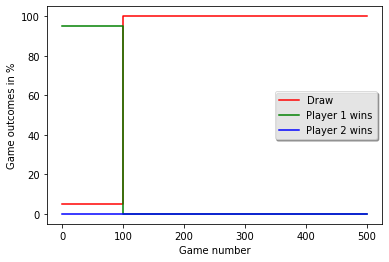

In [4]:
player1 = MinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2,5)
#5 is the number of battles

The Tabular Q-learning player learns to play optimally against the deterministic MinMax agent in less than 100 games. Let's see how it does against the non-deterministic Min Max Agent:

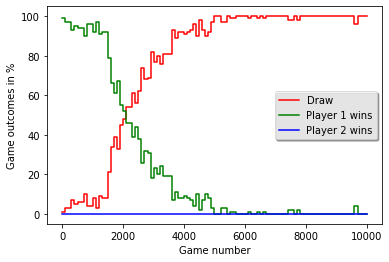

In [5]:
player1 = RndMinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)

TQPlayer i.e. Player2 is struggling quite a bit more now, needing about 9000 games to learn a close to perfect strategy. Let's see how the initial values of the Q function impact things. First, let's initialize with 1.0:

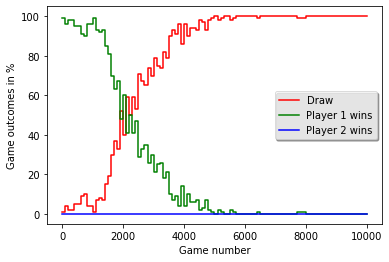

In [6]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=1.0)#optimistic player
eval_players(player1, player2, 100)

Observation :

Not worse, but the learning progress is a little less smooth. 

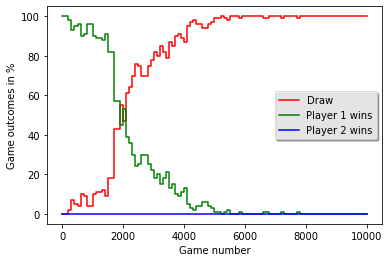

In [7]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=0.5)
eval_players(player1, player2, 100)

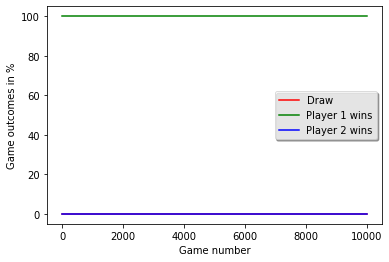

In [8]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=0)#Pessimistic player
eval_players(player1, player2, 100)

Let's try initial values of close to 0:

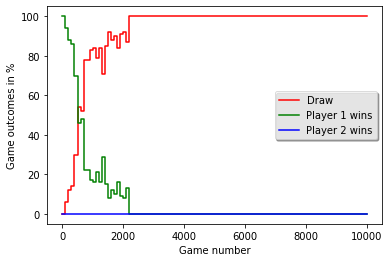

In [9]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=0.001)
eval_players(player1, player2, 100)

In contrast to the previous one, where the player was expecting to win and tried every possible way to achieve this, this time the player is quite happy to achieve a draw and settles for it much more quickly.

We try and experiement to know if a TQPlayer can learn from itself.

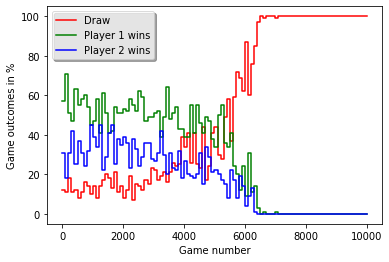

In [10]:
player1 = TQPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

Yes, after about 7000 games, it seems it has found a strategy to not lose against itself. How does this trained player do against a Min Max?

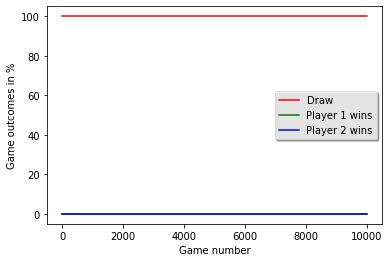

In [11]:
player1 = RndMinMaxAgent()
eval_players(player1, player2, 100)

Even against the Min Max player, which it has never played before, it does not lose any games. We created a player that can, just by playing against itself, learn how to play Tic Tac Toe perfectly against a Min Max opponent.

Now, how does it perform against a RandomPlayer:

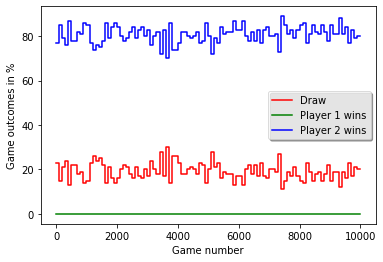

In [12]:
player3 = RandomPlayer()

eval_players(player3, player2, 100)

Again, no losses. It actually wins quite a lot of games now. 

One last thing we'll try is training a new TQPlayer against a Random Player:

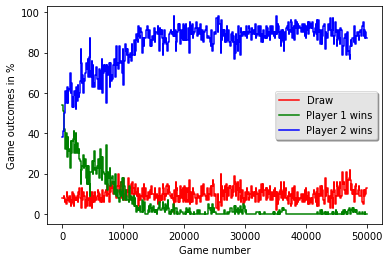

In [13]:
player1 = RandomPlayer() #This player plays first
player2 = TQPlayer()
eval_players(player1, player2, 500)

Observation:

Even after 50,000 games, it still loses the some of the games. However, it does seem to win more games against the Random Player based on this strategy than with the no-loss strategy(only draws, no wins) from before. Statistically it does better than the conservative no-loss strategy. I.e. it found some situations where, when it plays a move that may cause it to lose the game, chances are that the Random Player will make a mistake and it will actually win. It seems to be inclined to take this risk in certain situations.

## Conclusions TQPlayer vs Min Max

Both players have a severe limitation: They are only feasible for games with a small number of states. The Min Max player needs to be able to traverse the tree of possible continuations which is not feasible if there are as many as there are in Chess or Go. The TQPlayer needs to store the Q values for every state, which is also not feasible for games like chess or go.

The Min Max player has the advantage that it plays perfectly from the start. No need to learn anything. The TQPlayer on the other hand needs to play a lot of games to play well.

The TQPlayer however is able to learn effective strategies against opponents which play less than perfect. Min Max always assumes the opponent will make the best possible move in every situation. If that's not the case, the Min Max player is not able to exploit this flaw in its opponent. The TQPlayer however is more flexible and can learn an optimal stragegy against any opponent.
